In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, plot_roc_curve, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from statistics import mean, stdev
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv')
df = df.drop('state', axis =1)


In [3]:
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df.isnull().sum().any()

False

In [5]:
round(df.describe(),2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00
mean,100.24,7.63,180.26,99.91,30.64,200.17,100.18,17.02,200.53,99.84,9.02,10.26,4.43,2.77,1.56
std,39.70,13.44,54.01,19.85,9.18,50.25,19.91,4.27,50.35,20.09,2.27,2.76,2.46,0.75,1.31
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,73.00,0.00,143.33,87.00,24.36,165.92,87.00,14.10,167.22,86.00,7.52,8.50,3.00,2.30,1.00
50%,100.00,0.00,180.45,100.00,30.68,200.70,100.00,17.06,200.45,100.00,9.02,10.30,4.00,2.78,1.00
75%,127.00,16.00,216.20,113.00,36.75,233.78,114.00,19.87,234.70,113.00,10.56,12.00,6.00,3.24,2.00
max,243.00,52.00,351.50,165.00,59.76,359.30,170.00,30.54,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [6]:
# Define target variable (churn) and other binary variables as 0-1
df = df.replace({'churn': {'yes': 1, 'no': 0},
            'international_plan': {'yes' : 1, 'no': 0},
            'voice_mail_plan':{'yes' : 1, 'no': 0}})

In [20]:
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,118,9.57,7.5,7,2.03,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,188.3,70,32.01,243.8,88,20.72,...,79,9.62,10.3,6,2.78,0,0,0,1,0
4246,73,0,0,0,177.9,89,30.24,131.2,82,11.15,...,89,8.38,11.5,6,3.11,3,0,1,0,0
4247,75,0,0,0,170.7,101,29.02,193.1,126,16.41,...,104,5.81,6.9,7,1.86,1,0,1,0,0
4248,50,0,1,40,235.7,127,40.07,223.0,126,18.96,...,116,13.39,9.9,5,2.67,2,0,1,0,0


In [7]:
# Define area_code dummy
df = pd.get_dummies(df, columns=['area_code'])
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,118,9.57,7.5,7,2.03,3,0,0,0,1


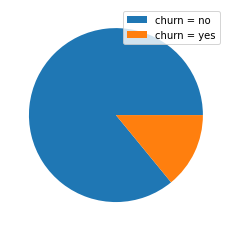

In [8]:
# Plot target variable --> we have an imbalanced class
plt.pie(df['churn'].value_counts())
plt.legend(['churn = no','churn = yes'])

In [9]:
dfx = df.drop("churn", axis=1)
dfy = df['churn']

In [10]:
# Split to create a final evaluation set
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=123)
# Cross validation (example only on Logistic Regression)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


/Users/utente/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8741176470588236

In [11]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8752941176470588

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9647058823529412

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9023529411764706

In [14]:
kf = KFold(n_splits = 10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [15]:
for train_index, test_index in kf.split(dfx):
    print(train_index, test_index)

[ 425  426  427 ... 4247 4248 4249] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [16]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [17]:
skf = StratifiedKFold(n_splits=10)

In [21]:
scores_l = []
scores_svm = []
scores_rf = []
scores_knn = []

for train_index, test_index in kf.split(dfx):
    X_train, X_test, y_train, y_test = dfx.iloc[train_index], dfx.iloc[test_index], dfy.iloc[train_index], dfy.iloc[test_index] 
    
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    scores_knn.append(get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test))
    

/Users/utente/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/utente/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [22]:
scores_l
np.mean(scores_l)

0.8583529411764707

In [ ]:
scores_svm
np.mean(scores_svm)

In [ ]:
scores_rf
np.mean(scores_rf)

In [ ]:
scores_knn
np.mean(scores_knn)

In [ ]:
cvs_l = cross_val_score(LogisticRegression(), df.drop("churn", axis=1), df['churn'])
cvs_l
np.mean(cvs_l)

In [ ]:
cvs_s = cross_val_score(SVC(), df.drop("churn", axis=1), df['churn'])
cvs_s
np.mean(cvs_l)

In [ ]:
cvs_r = cross_val_score(RandomForestClassifier(), df.drop("churn", axis=1), df['churn'])
cvs_r
np.mean(cvs_l)

In [ ]:
cvs_k = cross_val_score(KNeighborsClassifier(), df.drop("churn", axis=1), df['churn']) 
cvs_k
np.mean(cvs_l)

In [ ]:
pred = lr.predict(X_test)
print(classification_report(y_test, pred))